# Bagging and random forest

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

Loading the digits dataset using the load_digits function from sklearn.datasets and preparing a matrix of features X and answers on the training sample y (the data and target fields in the object that returns load_digits will be required).

In [3]:
digits = load_digits()
print(digits.data.shape)
print(digits.DESCR)

(1797L, 64L)
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each

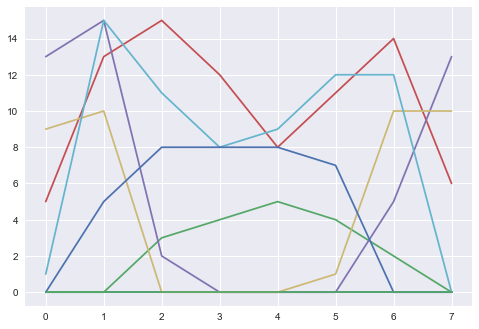

In [4]:
plt.gray()
plt.plot(digits.images[0])
plt.show()

In [5]:
X = digits.data
y = digits.target

To evaluate the quality, then you need to use cross_walk_score from sklearn.cross_validation with the cv=10 parameter. This function implements k-fold cross validation with k equal to the value of the cv parameter. It is proposed to use k=10 so that the quality estimates obtained have a small spread, and it is easier to check the answers received. In practice, k=5 is often enough. The cross_vol_score function will return numpy.ndarray, which will have k numbers - quality in each of the k experiments k-fold cross validation. To get the average value (which will be an assessment of the quality of work), call the method.mean() for the array that returns cross_val_score.

With a small probability, you can come across a case when the received quality in some of the points does not fall into the range set for correct answers - in this case, you need to try restarting the cell with cross_val_score several times and select the most "typical" value.

If you want to speed up the calculation of cross_val_score, you can try using the n_jobs parameter, but you need to be careful: in one of the old versions of sklearn there was an error that led to an incorrect result of cross_val_score when setting n_jobs other than 1. Now such a problem should not arise, but it will not be superfluous to check that everything is in order.

1.

Let's create a Decision Tree Classifier with default settings and measure the quality of its work using cross_vol_score. This value will be the answer in paragraph 1.

In [6]:
dt_classifier = DecisionTreeClassifier()

In [7]:
cvs = cross_val_score(dt_classifier, X, y, cv=10)

In [8]:
print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[ 0.79459459  0.86338798  0.81767956  0.83333333  0.79888268  0.87709497
  0.88826816  0.79775281  0.84180791  0.80113636]
Mean model quality value: 0.831393835637


In [9]:
with open("answer1.txt", "w") as fout:
    fout.write(str(cvs.mean()))

2.

Let's use the BaggingClassifier from sklearn.ensemble to train bagging over the Decision Tree Classifier. We use default parameters in BaggingClassifier, setting only the number of trees equal to 100.

The quality of the classification of the new model is the answer in paragraph 2. Note how the quality of the composition of the decision trees correlates with the quality of the work of one decision tree.

In [10]:
bagging = BaggingClassifier(dt_classifier, n_estimators=100)

In [11]:
cvs = cross_val_score(bagging, X, y, cv=10)

In [12]:
print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[ 0.87567568  0.94535519  0.90607735  0.93888889  0.92178771  0.98324022
  0.96089385  0.90449438  0.86440678  0.92613636]
Mean model quality value: 0.922695641692


In [13]:
with open("answer2.txt", "w") as fout:
    fout.write(str(cvs.mean()))

3.

Now let's study the BaggingClassifier parameters and choose them so that each basic algorithm is trained not on all d features, but on sqrt(d) random features. The quality of the resulting classifier is the answer in point 3. The root of the number of features is a frequently used heuristic in classification problems, in regression problems, the number of features divided by three is often taken. But in general, nothing prevents you from choosing any other number of random features.

In [14]:
n_features = digits.data.shape[1]
bagging = BaggingClassifier(dt_classifier, n_estimators=100, max_features=int(np.sqrt(n_features)))

In [15]:
cvs = cross_val_score(bagging, X, y, cv=10)

In [16]:
print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[ 0.91351351  0.9726776   0.92265193  0.92222222  0.94413408  0.94972067
  0.96648045  0.95505618  0.9039548   0.89772727]
Mean model quality value: 0.934813871536


In [17]:
with open("answer3.txt", "w") as fout:
    fout.write(str(cvs.mean()))

4.

Finally, let's try to select random features not once for the entire tree, but when constructing each vertex of the tree. This is not difficult to do: you need to remove the selection of a random subset of features in the BaggingClassifier and add it to the DecisionTreeClassifier. We will choose sqrt(d) of signs again. The quality of the resulting classifier in the control sample will be the answer in paragraph 4.

In [18]:
dt_classifier = DecisionTreeClassifier(max_features=int(np.sqrt(n_features)))
bagging = BaggingClassifier(dt_classifier, n_estimators=100)

In [19]:
cvs = cross_val_score(bagging, X, y, cv=10)

In [20]:
print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[ 0.90810811  0.9726776   0.9281768   0.95555556  0.94972067  0.98324022
  0.96648045  0.96067416  0.93785311  0.94318182]
Mean model quality value: 0.950566847848


In [21]:
with open("answer4.txt", "w") as fout:
    fout.write(str(cvs.mean()))

5.

The classifier obtained in point 4 is bagging on randomized trees (in which, when constructing each vertex, a random subset of features is selected and partitioning is searched only for them). This exactly corresponds to the Random Forest algorithm, so why not compare the quality of the classifier with the RandomForestClassifier from sklearn.ensemble. Then study how the quality of classification on this dataset depends on the number of trees, the number of features selected when constructing each vertex of the tree, as well as restrictions on the depth of the tree. For clarity, it is better to plot the quality dependence on the parameter values, but it is not necessary to do this to pass the task.

In [22]:
rf_classifier = RandomForestClassifier()
bagging = BaggingClassifier(rf_classifier, n_estimators=100)

In [23]:
cvs = cross_val_score(bagging, X, y, cv=10)

In [24]:
print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[ 0.90810811  0.96721311  0.94475138  0.95555556  0.95530726  0.98324022
  0.97765363  0.95505618  0.92655367  0.94318182]
Mean model quality value: 0.951662094723


In [27]:
with open("answer5.txt", "w") as fout:
    answer = str(2) + ' ' + str(3) + ' ' + str(4) + ' ' + str(7)
    fout.write(answer)

In [31]:
param_range = np.array([10, 50, 100, 150])
train_scores, test_scores = validation_curve(bagging, X, y, param_name="n_estimators", param_range=param_range, cv=10, scoring="accuracy")

In [32]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(train_scores_mean, test_scores_mean)

(array([ 0.9996909,  1.       ,  1.       ,  1.       ]), array([ 0.94768927,  0.95387176,  0.94938689,  0.94941504]))


In [33]:
param_range = np.array([5, 10, 20, 40])
train_scores, test_scores = validation_curve(bagging, X, y, param_name="max_features", param_range=param_range, cv=10, scoring="accuracy")

In [34]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(train_scores_mean, test_scores_mean)

(array([ 1.,  1.,  1.,  1.]), array([ 0.91158914,  0.93827933,  0.95271891,  0.95107631]))


In [38]:
param_range = np.array([5, 10, 50, 100])
train_scores, test_scores = validation_curve(bagging, X, y, param_name="base_estimator__max_depth", param_range=param_range, cv=10, scoring="accuracy")

In [39]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(train_scores_mean, test_scores_mean)

(array([ 0.97075316,  1.        ,  1.        ,  1.        ]), array([ 0.91874664,  0.95333507,  0.95163436,  0.95271258]))
